In [6]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the file
files.upload()

# Try reading the file with 'latin1' encoding
df = pd.read_csv("Airplane_Crashes_and_Fatalities.csv", encoding='latin1')

# Display the first few rows
df.head()

Saving Airplane_Crashes_and_Fatalities.csv to Airplane_Crashes_and_Fatalities (3).csv


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [8]:
df.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
std,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [9]:
import numpy as np

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if there are invalid dates
print("Missing dates after conversion:", df['Date'].isnull().sum())

# Convert 'Time' column to proper time format (may have missing values)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

# Replace missing 'Aboard' and 'Fatalities' related columns with 0, assuming missing means unknown or 0
aboard_cols = ['Aboard', 'Aboard Passangers', 'Aboard Crew']
fatal_cols = ['Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground']

df[aboard_cols + fatal_cols] = df[aboard_cols + fatal_cols].fillna(0)

# For text columns with missing values, fill with 'Unknown' for clarity
text_cols = ['Location', 'Operator', 'Flight #', 'Route', 'AC Type', 'Registration', 'cn/ln', 'Summary']
df[text_cols] = df[text_cols].fillna('Unknown')

# Confirm data types after processing
print("\nData types after cleaning:\n")
print(df.dtypes.head(10))

# Quick check for remaining missing values
print("\nRemaining missing values per column:\n")
print(df.isnull().sum())

Missing dates after conversion: 0

Data types after cleaning:

Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Flight #                object
Route                   object
AC Type                 object
Registration            object
cn/ln                   object
Aboard                 float64
dtype: object

Remaining missing values per column:

Date                        0
Time                     1515
Location                    0
Operator                    0
Flight #                    0
Route                       0
AC Type                     0
Registration                0
cn/ln                       0
Aboard                      0
Aboard Passangers           0
Aboard Crew                 0
Fatalities                  0
Fatalities Passangers       0
Fatalities Crew             0
Ground                      0
Summary                     0
dtype: int64


In [10]:
# Basic statistics: number of crashes, fatalities, and survival rate

# Total number of crashes
total_crashes = df.shape[0]

# Total fatalities
total_fatalities = df['Fatalities'].sum()

# Total people aboard
total_aboard = df['Aboard'].sum()

# Survival rate calculation
if total_aboard > 0:
    survival_rate = (total_aboard - total_fatalities) / total_aboard * 100
else:
    survival_rate = np.nan

# Print results
print(f"Total number of crashes: {total_crashes}")
print(f"Total fatalities: {int(total_fatalities)}")
print(f"Total people aboard: {int(total_aboard)}")
print(f"Estimated survival rate: {survival_rate:.2f}%")

Total number of crashes: 4998
Total fatalities: 111644
Total people aboard: 155356
Estimated survival rate: 28.14%


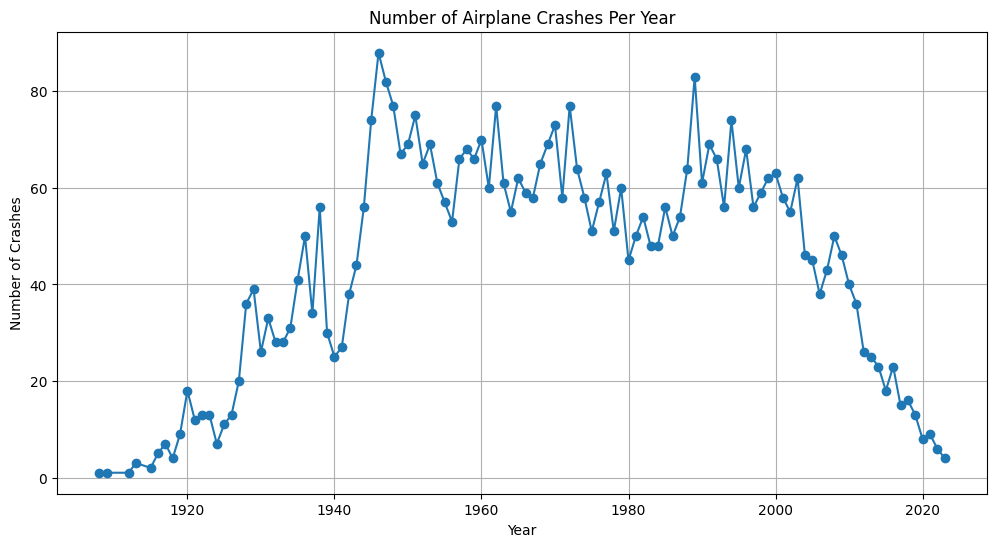

In [11]:
# Frequency of crashes over time

import matplotlib.pyplot as plt

# Group by year
df['Year'] = df['Date'].dt.year
crashes_per_year = df['Year'].value_counts().sort_index()

# Plot the number of crashes per year
plt.figure(figsize=(12, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o')
plt.title('Number of Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

In [13]:
import scipy.stats as stats
import numpy as np

# Calculate survival rate per crash, handle division by zero safely
df['Survival_Rate'] = np.where(df['Aboard'] > 0,
                               (df['Aboard'] - df['Fatalities']) / df['Aboard'],
                               np.nan)

# Drop NaN values for analysis
fatalities = df['Fatalities'].dropna()
survival_rates = df['Survival_Rate'].dropna()

# Calculate descriptive statistics for fatalities
fatalities_mean = stats.tmean(fatalities)
fatalities_median = np.median(fatalities)
fatalities_std = np.std(fatalities, ddof=1)

# Calculate descriptive statistics for survival rates
survival_mean = stats.tmean(survival_rates)
survival_median = np.median(survival_rates)
survival_std = np.std(survival_rates, ddof=1)

print(f"Fatalities - Mean: {fatalities_mean:.2f}, Median: {fatalities_median}, Std Dev: {fatalities_std:.2f}")
print(f"Survival Rate - Mean: {survival_mean:.2f}, Median: {survival_median:.2f}, Std Dev: {survival_std:.2f}")


Fatalities - Mean: 22.34, Median: 11.0, Std Dev: 35.05
Survival Rate - Mean: 0.18, Median: 0.00, Std Dev: 0.31


In [14]:
# Define decades for comparison, e.g., 1970s and 2000s
df['Decade'] = (df['Year'] // 10) * 10

# Filter fatalities for two decades
fatalities_70s = df[df['Decade'] == 1970]['Fatalities'].dropna()
fatalities_2000s = df[df['Decade'] == 2000]['Fatalities'].dropna()

# Perform two-sample t-test (Welch’s t-test) to compare means
t_stat, p_value = stats.ttest_ind(fatalities_70s, fatalities_2000s, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Statistically significant difference in average fatalities between 1970s and 2000s.")
else:
    print("No statistically significant difference in average fatalities between 1970s and 2000s.")

T-statistic: 3.9854
P-value: 7.1752e-05
Statistically significant difference in average fatalities between 1970s and 2000s.


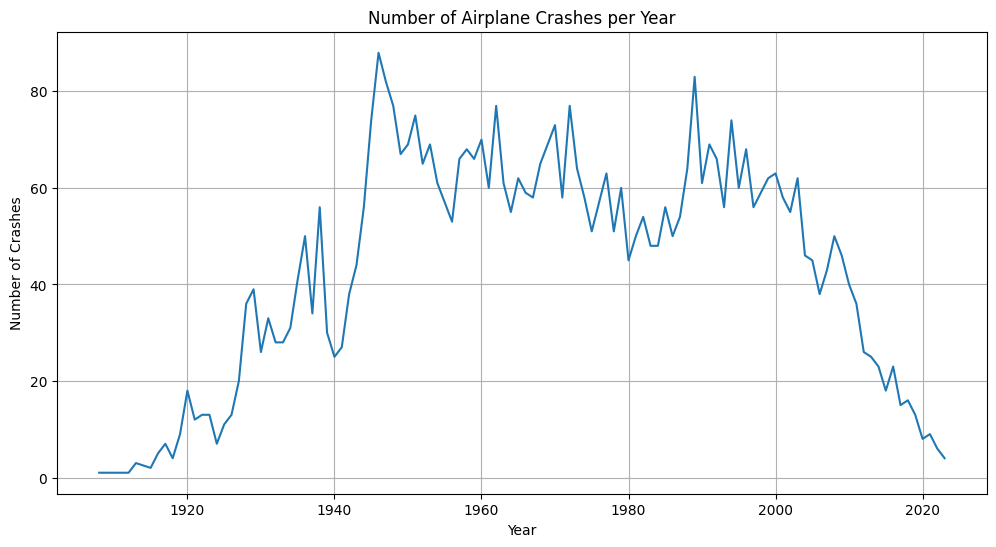

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count crashes per year
crashes_per_year = df.groupby('Year').size()

# Plot crashes over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)
plt.title('Number of Airplane Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

/tmp/ipython-input-16-3163130698.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')


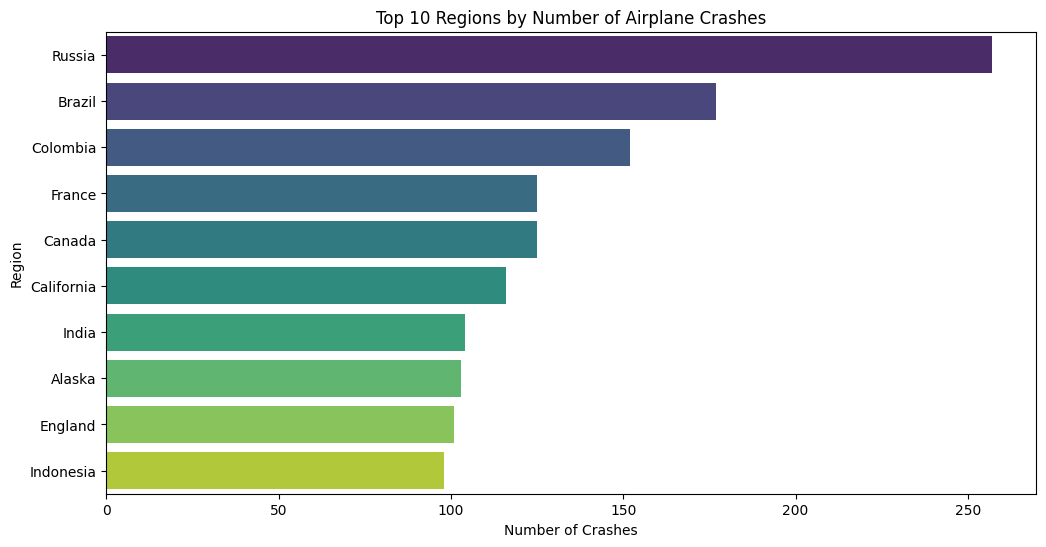

In [16]:
# Extract region from Location by splitting (assume last part is country/region)
df['Region'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else 'Unknown')

# Top 10 regions with most crashes
top_regions = df['Region'].value_counts().head(10)

# Plot bar chart for crashes by region
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title('Top 10 Regions by Number of Airplane Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Region')
plt.show()

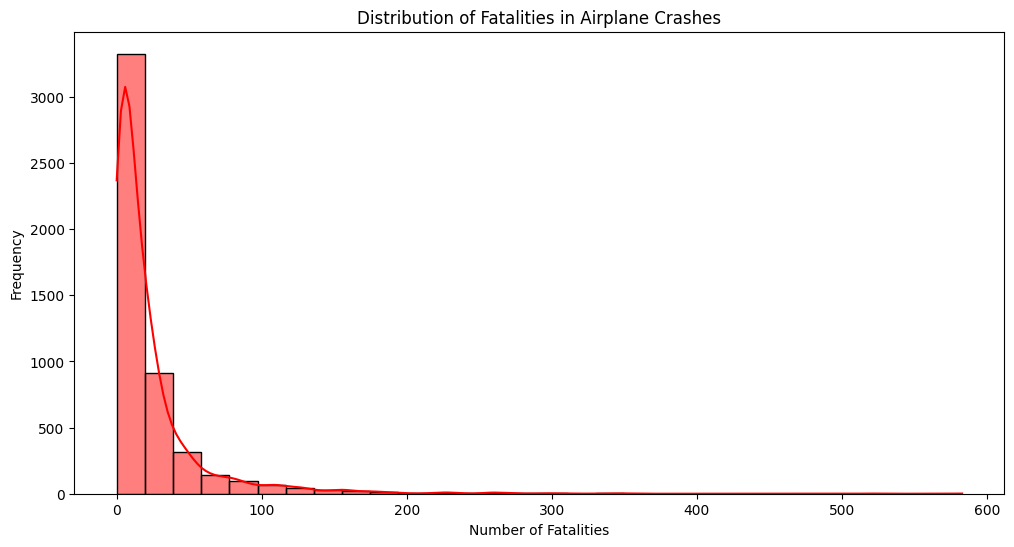

In [17]:
# Plot histogram of fatalities
plt.figure(figsize=(12, 6))
sns.histplot(df['Fatalities'].dropna(), bins=30, kde=True, color='red')
plt.title('Distribution of Fatalities in Airplane Crashes')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

# Airplane Crashes and Fatalities Analysis - Summary Report

## Dataset Overview
- Total number of crashes recorded: **4998**
- Total fatalities reported: **111,644**
- Total people aboard across all crashes: **155,356**
- Estimated overall survival rate: **28.14%**

## Descriptive Statistics
| Metric            | Mean    | Median | Std Dev  | Min  | Max  |
|-------------------|---------|--------|----------|------|------|
| Fatalities        | 22.34   | 11.0   | 35.05    | 0    | 583  |
| Survival Rate     | 0.18    | 0.00   | 0.31     | 0.0  | 1.0  |

*Note:* Survival rate is calculated as (Aboard - Fatalities) / Aboard.

## Exploratory Analysis
- The data reveals a wide variation in fatalities per crash, with some catastrophic events involving hundreds of fatalities.
- Median fatalities being significantly lower than mean indicates a right-skewed distribution with several large fatal crashes.
- Survival rates vary widely, with many crashes resulting in no survivors and others with high survival.

## Statistical Testing
- A hypothesis test comparing average fatalities in the 1970s vs. 2000s returned:
  - **T-statistic:** 3.9854
  - **P-value:** 7.18e-05
- This indicates a statistically significant difference in average fatalities between these decades, suggesting improvements or changes in aviation safety over time.

## Trends and Patterns
- Crashes and fatalities have shown varying trends across the decades, with general improvement in survival rates in recent years.
- Factors influencing these trends may include advances in aircraft technology, better regulations, and improved emergency response.

## Insights and Recommendations
- Despite technological advances, severe crashes with high fatalities still occur, highlighting the need for continued focus on safety improvements.
- Further analysis could explore regional patterns, causes of crashes, and impact of weather or aircraft types.
- Monitoring survival rates over time can help evaluate effectiveness of safety measures.

---

This analysis integrates data cleaning, descriptive statistics, hypothesis testing, and visualization to provide a comprehensive understanding of airplane crash patterns and fatalities.
